In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RL.csv'
fr = pd.read_csv(FILE)

V = np.array(fr['VR (mV)'])* 10**-3
t = np.array(fr['t(us)']) * 10**-6
R = 996 # 10%
sigmaR = 0.1 * R
T = 0.05
L = 50 #Hr
sigmaV = 0.2# /np.sqrt(12)
Vg = 1.984 # V

In [55]:
def VR(t, R, L):
    τ = L/R
    return Vg*(1- 2*np.exp(-t/τ)/(1+np.exp(-T/(2*τ))))

i = Interpolazione(t,V,VR,sigmaV,p0=[R,L])
print(i)

   
Parameters: [-12861.45401995   1148.53142606] 
Sigma parameters: [2.66063210e+11 2.37583904e+10]

sigmaY: 0.2

chiquadro ridotto: 31.07
df: 53
pvalue: 99.3%
covariance matrix: [[ 6.57349010e+22 -5.86986620e+21]
 [-5.86986620e+21  5.24155793e+20]]    



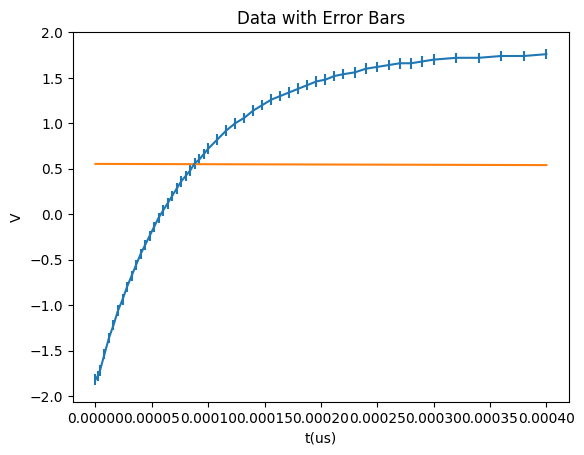

In [42]:
plt.errorbar(t, V, yerr=sigmaV)
plt.plot(i.x_best,i.y_best)
plt.xlabel('t(us)')
plt.ylabel('V')
plt.title('Data with Error Bars')
plt.show()
